# Homework 3: Reproducibility in Climate Studies

* **Statistics 159/259, Spring 2022**
* **Due 03/23/2023, 23:59PM PT**
* Prof. F. Pérez and GSI F. Sapienza, Department of Statistics, UC Berkeley.
* This assignment is worth a maximum of **50 points**.
* Assignment type: **group homework assignment** (Check on Ed Discussion about group's assignments).

## 2. The West Coast Heat Wave

In 2016 [Dr. Chelle Gentemann](https://cgentemann.github.io) and collaborators published a [paper](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2016GL071039) on the heat wave in the ocean off the California coast

The analysis was then performed using Matlab to process scientific data. To make Figure 1, here are the following steps:
- Download 4 TB of data from NASA PO.DAAC data archive via FTP
- Go through each day of data and subset to the West Coast Region to reduce size and save each subsetted day
- Go through 2002-2012 and create a daily climatology and save all 365 days of the climatology
- Go through each day of data and calculate the anomaly and save each day's anomaly

This whole process took about 1-2 month. 
Below we will do this using MUR SST data on AWS Open Data Program in a few minutes using Python.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

Subset all the data to just the West Coast region

In [8]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")



This is how a rough version of one of the plots in the paper look like

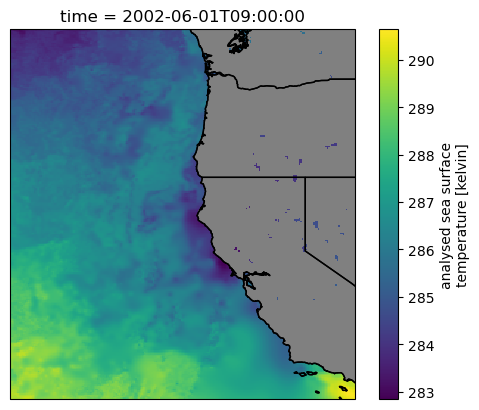

In [9]:
#ds.analysed_sst[0, :, :].plot()

# Plot on a map
ax = plt.subplot(projection=crs)
ds.analysed_sst[0, :, :].plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))



### Question 5 [10 points]

Reproduce one of the images in Figure 2. If you feel adventurous, you can make more than one!

In [10]:
time_period_sst_2002_to_2016_07 = ds.analysed_sst.sel(time=slice('2002', '2016-07'))
time_period_sst_2002_to_2012 = ds.analysed_sst.sel(time=slice('2002', '2012'))

time_period_max = time_period_sst_2002_to_2016_07.groupby(time_period_sst_2002_to_2016_07.time.dt.dayofyear).max()
time_period_mean = time_period_sst_2002_to_2012.groupby(time_period_sst_2002_to_2012.time.dt.dayofyear).mean()

In [11]:
time_period_anomaly = time_period_max - time_period_mean

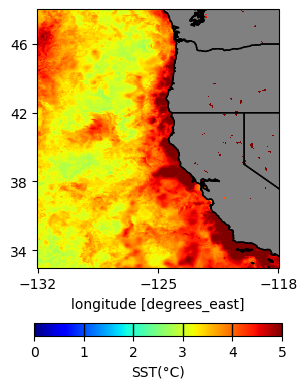

In [12]:
ax = plt.subplot(projection=crs)

ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))

cmap = time_period_anomaly.max(dim='dayofyear').plot(x = 'lon', y = 'lat',cmap = 'jet',transform=crs, add_colorbar=False)

#setting features of y-axis
ax.set_yticks(range(34,50,4)) # add ticks for y axis
ax.set_ylabel('')

#ax.set_xticks('138W    130W    122W')
#ax.set_xticks(['-132', '-126', '-118'])
#ax.set_xticks(ticks=[-132, -126, -118], labels=['-132W', '-126W', '-118W'])
#ax.set_xticklabels(['-132W', '-126W', '-118W'])
#setting features of x-axis
#color bar

cbar = plt.colorbar(cmap, ax=ax, location='bottom', shrink=0.5, pad=0.15)
cbar.set_ticks(range(0,6))
cbar.set_label('SST(°C)')
cbar.mappable.set_clim(0, 5)

ticks = cbar.ax.get_xticks()
for tick in ticks:
    cbar.ax.axvline(x = tick, color='black', linewidth = 1)


a = [-132, -125, -118]
#b = ['132W', '126W', '118W']

ax.set_xticks(a)

plt.show()
